# NBA vs NFL Subreddit Part 2 - Data Cleaning and EDA
---

_Author: Matthew Hill_

### Imports
---

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from nltk.stem import WordNetLemmatizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### _Subsets for Model_
---

In [6]:
nbadf = pd.read_csv('../Data/nba')
nfldf = pd.read_csv('../Data/nfl')

In [7]:
nbadf.head(3)

,Unnamed: 0,subreddit,selftext,title
0,0,nba,NaN,2022-23 Lakers Season Begins — Narrated by LeB...
1,1,nba,[deleted],[C.J. Holmes] Klay Thompson said he has no int...
2,2,nba,NaN,[Wojnarowski] Fanatics CEO Michael Rubin compl...


In [8]:
nfldf.head(3)

,Unnamed: 0,subreddit,selftext,title
0,0,nfl,NaN,The true reason we're all excited for TNF
1,1,nfl,Longest active streaks not above .500 in NFL \...,Interesting statistic
2,2,nfl,NaN,"[RapSheet] Sources: #Jets WR Elijah Moore, fru..."


##### Drop 'Unnamed: 0' columns
---

In [9]:
nbadf.drop(columns=['Unnamed: 0', 'selftext'], inplace = True)
nfldf.drop(columns=['Unnamed: 0', 'selftext'], inplace = True)

In [10]:
nbadf.head(3)

,subreddit,title
0,nba,2022-23 Lakers Season Begins — Narrated by LeB...
1,nba,[C.J. Holmes] Klay Thompson said he has no int...
2,nba,[Wojnarowski] Fanatics CEO Michael Rubin compl...


In [11]:
nfldf.head(3)

,subreddit,title
0,nfl,The true reason we're all excited for TNF
1,nfl,Interesting statistic
2,nfl,"[RapSheet] Sources: #Jets WR Elijah Moore, fru..."


### NBA Top 10 Words Excluding Stop Words & Only 2 word phrases

In [9]:
X = nbadf['title']
y = nbadf['subreddit']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [11]:
# Instantiate (w/ ngrams)
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))

#Fit
cvec.fit(X_train)

#Transform
X_train = cvec.transform(X_train)
X_test = cvec.transform(X_test)

In [12]:
X_train = pd.DataFrame(X_train.todense(), 
                          columns=cvec.get_feature_names())

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


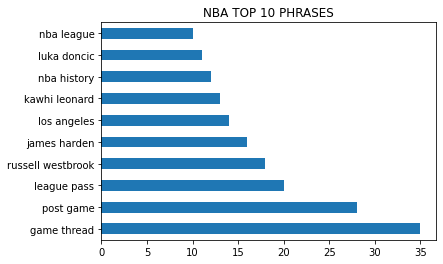

In [15]:
X_train.sum().sort_values(ascending = False).head(10).plot(kind = 'barh')
plt.title('NBA TOP 10 PHRASES');

### NFL Top 10 Words Excluding Stop Words & Only 2 word phrases

In [17]:
X2 = nfldf['title']
y2 = nfldf['subreddit']

In [18]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,
                                                    y2,
                                                    stratify=y2,
                                                    random_state=42)

In [19]:
# Instantiate (w/ ngrams)
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,2))

#Fit
cvec.fit(X2_train)

#Transform
X2_train = cvec.transform(X2_train)
X2_test = cvec.transform(X2_test)

In [20]:
X_train2 = pd.DataFrame(X2_train.todense(), 
                          columns=cvec.get_feature_names())

/Users/dimarhill/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


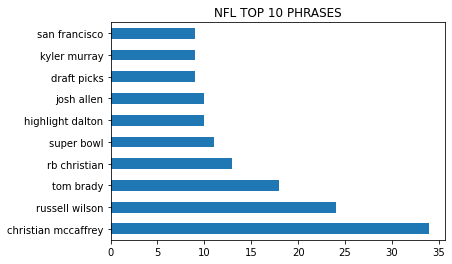

In [21]:
X_train2.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.title('NFL TOP 10 PHRASES');